In [31]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt


# Let’s run the basic SIR model

In [32]:
# describe the model
def deriv(y, t, N, beta, k, delta):
    S, E, I, R = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - k * E
    dIdt = delta * E - k * I
    dRdt = k * I
    return dSdt, dEdt, dIdt, dRdt

In [33]:
# describe the parameters
N =  1957           # population
beta = 2.5            
k= 1/7
delta = 1/5
S0, E0, I0, R0 = N-1, 1, 0, 0 # initial conditions: one infected, rest susceptible

In [34]:
t = np.linspace(0, 99, 100) # Grid of time points (in days)
y0 = S0, E0, I0, R0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, k, delta))
S, E, I, R = ret.T

In [37]:
def plotsir(t, S, E, I, R):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
  ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')

  ax.set_xlabel('Time (days)')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.savefig("plot.png")
  plt.show();

plot the graph

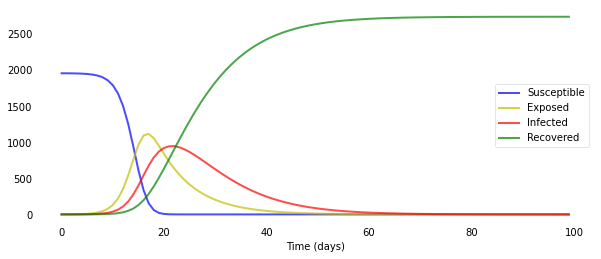

In [38]:

plotsir(t, S, E, I, R)